# Search and Download CTX images from ADAM-Space

In this notebook we are going to use the ADAM-API to search and download CTX images in a given region of the Martian surface.
In particular, this document will teach you:
- to query ADAM-Space for data products in a given region (bounding-box),
- to request certain data products for download,
- to retrieve ADAM download products,
- finally, to visualize a (downloaded) CTX image.

#### Requirements

- ADAM-API (https://pypi.org/project/adamapi/)
- ADAM-API Key (see notebook `get_adamapi_key.ipynb`)

In [3]:
import os

### ADAM-API Key

The ADAM-API Key is unique to each user, _never share your API Key with anybody, nor save and publish it_. 
For this reason -- security --, it is advised to save your API Key/Token in a file or in your environment variables.

> Here, we read our API Key from a file called `env.sh`.

To initialize the (ADAM) API client, we need to pass the API's:
- Key (`api_key`)
- Server URL (`api_url`)

In [48]:
def init_adam(token=None):
    from adamapi import Auth
    from adamapi import GetData

    api_url = "https://explorer-space.adamplatform.eu"

    if token:
        api_key = token
    else:
        try:
            api_key = os.environ["ADAMAPI_KEY"]
        except:
            raise ValueError("Export ADAMAPI_KEY or give 'token' argument")
        try:
            api_url = os.environ["ADAMAPI_URL"]
        except:
            pass
    
    a = Auth()
    a.setKey(api_key)
    a.setAdamCore(api_url)
    a.authorize()

    return a

### API Key

We read the ADAM-API Key (token) from a file called `env.sh`.

Example of `env.sh`:
```bash
ADAMAPI_KEY='jasdh9q3rht3n-bnq34t#$tfpqgrtbalg.f+'
```

In [49]:
token = !(source env.sh && echo $ADAMAPI_KEY)
token = token.pop()

### Initialize ADAM-API client

In the function `init_adam()`, as we can see above, we use the token/key given and the server URL to initialize the client.

In [50]:
client = init_adam(token)

### Query datasets

With the client succesfully initialized, we ask the API for all datasets available to our user to access.

In [51]:
from adamapi import Datasets

dsets_obj = Datasets( client )

dsets_obj

In [53]:
datasets_meta = dsets_obj.getDatasets()
datasets_meta.keys()

dict_keys(['type', 'properties', '58592:MRO_CTX', '91247:MRO_HIRISE'])

### CTX dataset

From the list of available datasets, CTX is the one of our interest. We, then, ask for the attributes of the dataset.

In the "list" (JSON object) of attributes associated to the dataset we have various information such as instruments the dataset is built from, time and geographical coverage of the data products as well as image observation attributes (_e.g._, Observation Angle) that can be used to filter products (images) of interest.

In [61]:
dataset_id = '58592:MRO_CTX'

In [62]:
mro_ctx_meta = dsets_obj.getDatasets(dataset_id)
mro_ctx_meta

{'datasetId': 'MRO_CTX',
 'creationDate': '2021-04-13T15:23:24Z',
 'dataType': 'Float32',
 'epsg': '4326',
 'keywords': [],
 'license': {'documentationUrl': '',
  'dataProviderName': 'Jacobs University',
  'dataProviderUrl': '',
  'licenseId': '',
  'dataPolicy': '',
  'doi': '',
  'credits': ''},
 'maxDate': '2020-08-31T18:19:37Z',
 'maxValue': [0.2],
 'minDate': '2006-03-24T04:41:07Z',
 'minValue': [-0.02],
 'noDataValue': -9999,
 'numberOfRecords': 7495,
 'profile': {'profileSchema': 'space_profile.json',
  'name': 'Space',
  'targetName': 'MARS',
  'observationMode': 'EDR',
  'instrument': 'CONTEXT CAMERA',
  'instrumentId': 'CTX',
  'mission': 'MARS RECONNAISSANCE ORBITER',
  'missionId': 'MRO',
  'processingLevel': '',
  'solarLongitudeMin': '',
  'solarLongitudeMax': '',
  'solarDistanceMin': '',
  'solarDistanceMax': '',
  'solarLongitudeStart': '',
  'solarLongitudeEnd': '',
  'EmissionAngleMax': 32.39,
  'EmissionAngleMin': 0.03,
  'IncidenceAngleMax': 86.83,
  'IncidenceAngl

### Search data products

For the sake of simplicity, let's query the API for one data product in the CTX dataset (`dataset_id`, defined above).

In [58]:
# SEARCH

from adamapi import Search

search_client = Search( client )
search_client

In [ ]:
search_client.getProducts(dataset_id, maxRecords=1, startIndex=0)

### Define download attributes

From the answer given by the ADAM, we define the name of product we want to download, and the name of the file the product will be downloaded to in our (local) disk.

In [64]:
product_id = "N09_065928_1343_XN_45S158W.tif"

In [76]:
output_dir = './data/adam/'

output_filename = output_dir + product_id + '.zip'

### Download image

Once the attributes defining the product we want to download has been defined (`dataset_id`, `product_id`, `outputFname`), we request ADAM-API to download it.

In [77]:
from adamapi import GetData

data_client = GetData(client)

data_client.getData(dataset_id, productId = product_id, outputFname = output_filename)

'./data/adam/N09_065928_1343_XN_45S158W.tif.zip'

### Unpack the product(s)

When we download one product -- or many products at once -- with ADAM-API, the output file is written inside a `zip` file.
To have access to the image, we just have to unpack (or decompress) the `zip` files.

In [78]:
import shutil

shutil.unpack_archive(output_filename, output_dir)

In [86]:
!ls -lh $output_dir

total 3825856
-rw-r--r--  1 chbrandt  staff   934M Jul  2 02:09 N09_065928_1343_XN_45S158W.tif
-rw-r--r--  1 chbrandt  staff   934M Jul  2 02:07 N09_065928_1343_XN_45S158W.tif.zip


In [82]:
tif_filename = output_filename.rstrip('.zip')
tif_filename

'./data/adam/N09_065928_1343_XN_45S158W.tif'

### Visualize the image

Finally, let's visualize the image downloaded using `rasterio` and `matplotlib`.

Text(0, 0.5, 'Latitude')

/opt/miniconda3/envs/npt/lib/python3.10/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


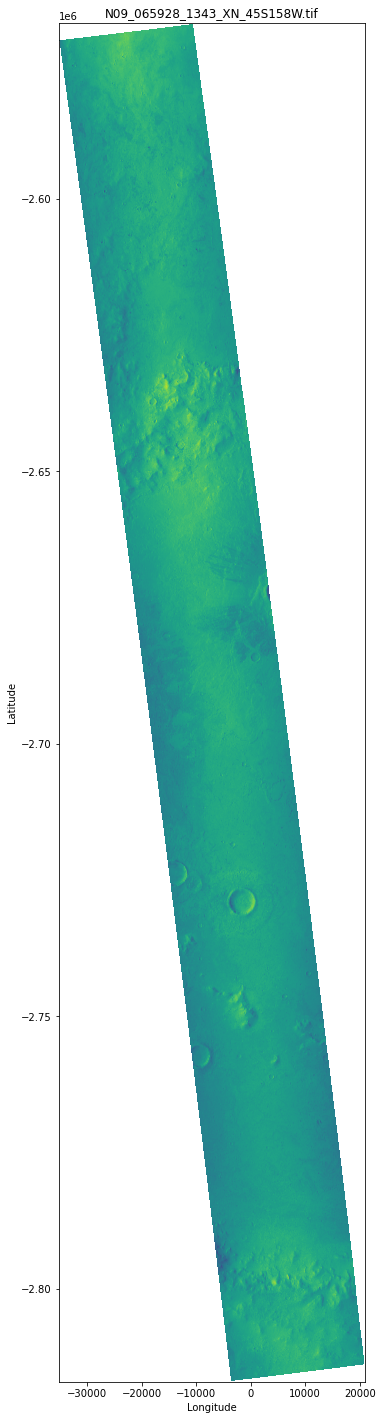

In [89]:
%matplotlib inline

import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(25,25))

with rasterio.open(tif_filename) as src:
    show(src, ax=ax)
    
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(product_id);